# Solve Tree Problems Recursively

https://leetcode.com/explore/learn/card/data-structure-tree/17/solve-problems-recursively/534/

In previous sections, we have introduced how to solve tree traversal problems recursively. Recursion is one of the most powerful and frequently used techniques for solving tree problems.

As we know, a tree can be defined recursively as a node(the root node) that includes a value and a list of references to children nodes. **Recursion is one of the natural features of a tree.** Therefore, many tree problems can be solved recursively. For each recursive function call, we only focus on the problem for the current node and call the function recursively to solve its children.

Typically, we can solve a tree problem recursively using a top-down approach or using a bottom-up approach.

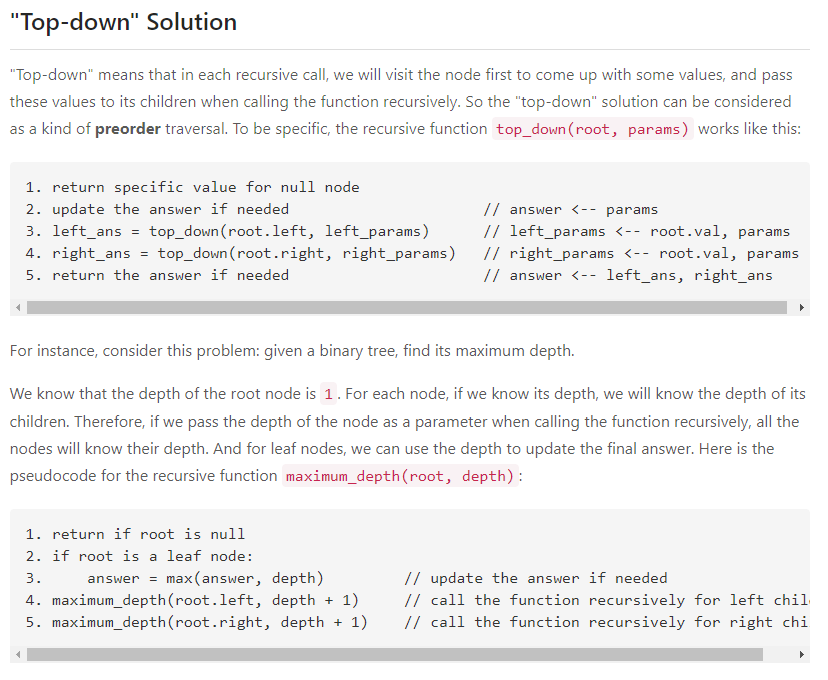

```cpp
int answer; // don't forget to initialize answer before call maximum_depth
void maximum_depth(TreeNode* root, int depth) {
    if (!root) {
        return;
    }
    if (!root->left && !root->right) {
        answer = max(answer, depth);
    }
    maximum_depth(root->left, depth + 1);
    maximum_depth(root->right, depth + 1);
}

```

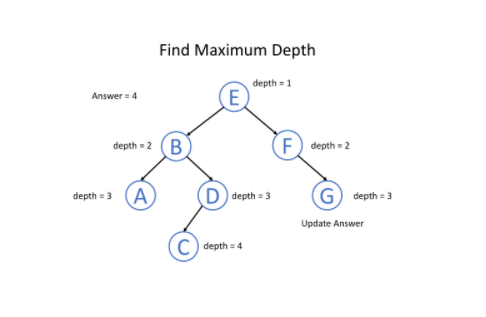

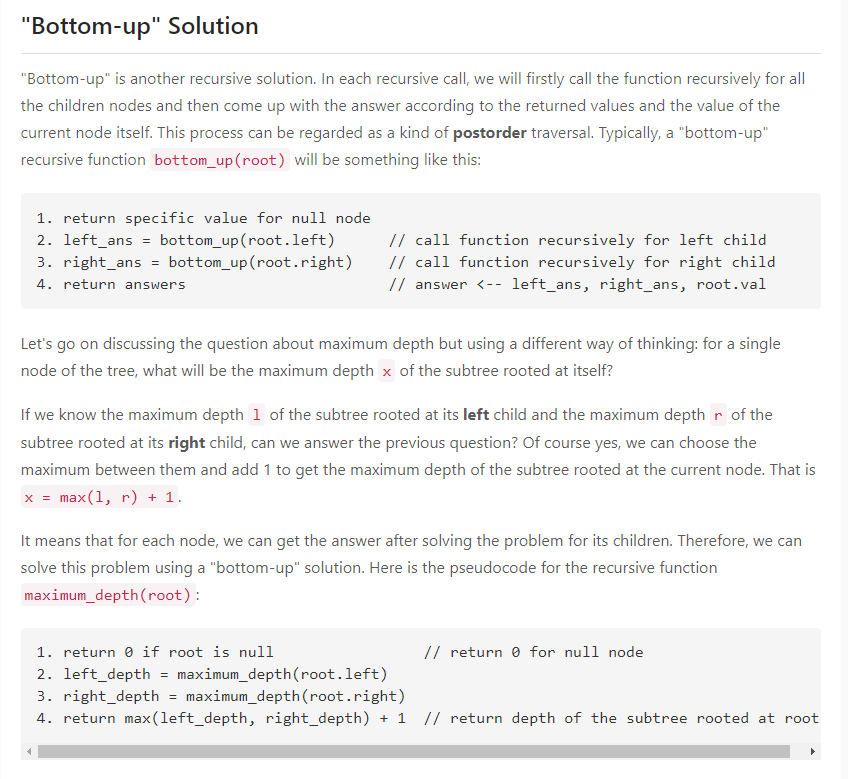

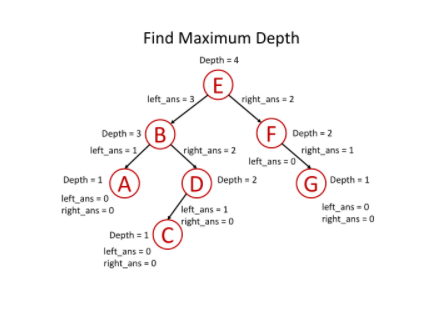

```cpp
int maximum_depth(TreeNode* root) {
    if (!root) {
        return 0;                                 // return 0 for null node
    }
    int left_depth = maximum_depth(root->left);
    int right_depth = maximum_depth(root->right);
    return max(left_depth, right_depth) + 1;      // return depth of the subtree rooted at root
}

```

## Conclusion
----
It is not easy to understand recursion and find out a recursive solution for the problem. It needs practice.
When you meet a tree problem, ask yourself two questions: Can you determine some parameters to help the node know its answer? Can you use these parameters and the value of the node itself to determine what should be the parameters passed to its children? If the answers are both yes, try to solve this problem using a "top-down" recursive solution.

Or, you can think of the problem in this way: for a node in a tree, if you know the answer of its children, can you calculate the answer of that node? If the answer is yes, solving the problem recursively using a bottom up approach might be a good idea.

In the following sections, we provide several classic problems for you to help you understand tree structure and recursion better.

## Maximum Depth of Binary Tree

https://leetcode.com/explore/learn/card/data-structure-tree/17/solve-problems-recursively/535/

Given the root of a binary tree, return its maximum depth.

A binary tree's maximum depth is the number of nodes along the longest path from the root node down to the farthest leaf node.

 

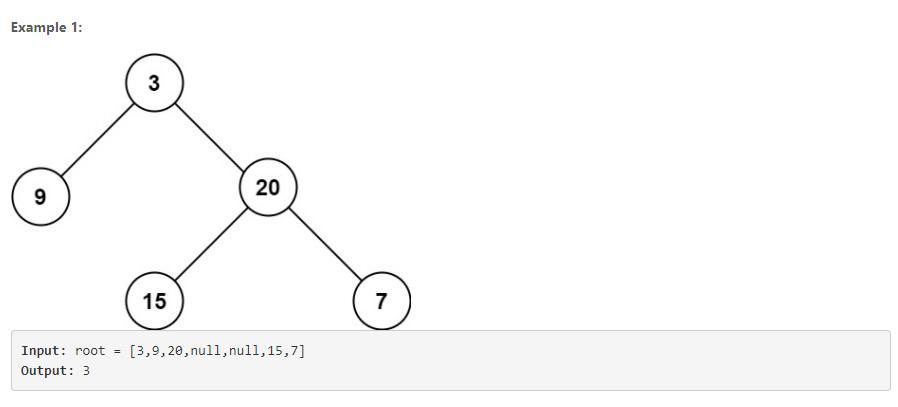

#### Accepted
```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode() : val(0), left(nullptr), right(nullptr) {}
 *     TreeNode(int x) : val(x), left(nullptr), right(nullptr) {}
 *     TreeNode(int x, TreeNode *left, TreeNode *right) : val(x), left(left), right(right) {}
 * };
 */
class Solution {
public:
    int DFS(TreeNode* cur){
        if(!cur){
            return 0;
        }
        
        if(!cur->left and !cur->right){
            return 1;
        }
        
        int max_depth = -1;
        if(cur->left){
            max_depth = DFS(cur->left);
        }
        if(cur->right){
            int tmp = DFS(cur->right);
            if(tmp>=max_depth){
                max_depth = tmp;
            }
        }
        return max_depth +1;
    }
    
    
    
    
    int maxDepth(TreeNode* root) {
        return DFS(root);
        
    }
};

```

### Solutions
https://leetcode.com/problems/maximum-depth-of-binary-tree/solution/

#### Tree definition
```cpp
/* Definition for a binary tree node. */
struct TreeNode {
  int val;
  TreeNode *left;
  TreeNode *right;
  TreeNode(int x) : val(x), left(NULL), right(NULL) {}
};
```

#### Approach 1: Recursion     

##### 直接用null来判断就可以了

```cpp
class Solution {
  public:
    int maxDepth(TreeNode *root) {
      if (root == NULL) {
        return 0;
      }
      return max(1 + maxDepth(root -> left), 1 + maxDepth(root -> right));
    }
};
```

#### Approach 2: Tail Recursion + BFS
```cpp
class Solution {

  private:
    // The queue that contains the next nodes to visit, 
    //   along with the level/depth that each node is located.
    queue<pair<TreeNode*, int>> next_items;
    int max_depth = 0;
    
    /**
     * A tail recursion function to calculate the max depth
     *   of the binary tree.
     */
    int next_maxDepth() {
    
      if (next_items.size() == 0) {
        return max_depth;
      }
        
      auto next_item = next_items.front();
      next_items.pop();

      auto next_node = next_item.first;
      auto next_level = next_item.second + 1;
      
      max_depth = max(max_depth, next_level);

      // Add the nodes to visit in the following recursive calls.
      if (next_node->left != NULL) {
        next_items.push(make_pair(next_node->left, next_level));
      }
      if (next_node->right != NULL) {
        next_items.push(make_pair(next_node->right, next_level));
      }
    
      // The last action should be the ONLY recursive call
      //   in the tail-recursion function.
      return next_maxDepth();
    }
    
  public:
    int maxDepth(TreeNode* root) {
      if (root == NULL) return 0;
        
      // clear the previous queue.
      std::queue<pair<TreeNode*, int>> empty;
      std::swap(next_items, empty);
      max_depth = 0;
        
      // push the root node into the queue to kick off the next visit.
      next_items.push(make_pair(root, 0));
        
      return next_maxDepth();
    }
};
```

#### Approach 3: Iteration
```cpp
class Solution {
  public:
  int maxDepth(TreeNode* root) {
    if (root == NULL) {
      return 0;
    }

    vector<pair<int, TreeNode*>> my_stack;
    my_stack.push_back(pair<int, TreeNode*>(1, root));
    int max_depth = 0;
    while (!my_stack.empty()) {
      pair<int, TreeNode*> my_pair = my_stack.back();
      int c_depth = get<0>(my_pair);
      TreeNode* c_node = get<1>(my_pair);
      max_depth = max(max_depth, c_depth);
      my_stack.pop_back();
      if (c_node->left != NULL) {
        my_stack.push_back(pair<int, TreeNode*>(c_depth + 1, c_node->left));
      }
      if (c_node->right != NULL) {
        my_stack.push_back(pair<int, TreeNode*>(c_depth + 1, c_node->right));
      }
    }
    return max_depth;
  }
};
```

## Symmetric Tree

Given the root of a binary tree, check whether it is a mirror of itself (i.e., symmetric around its center).

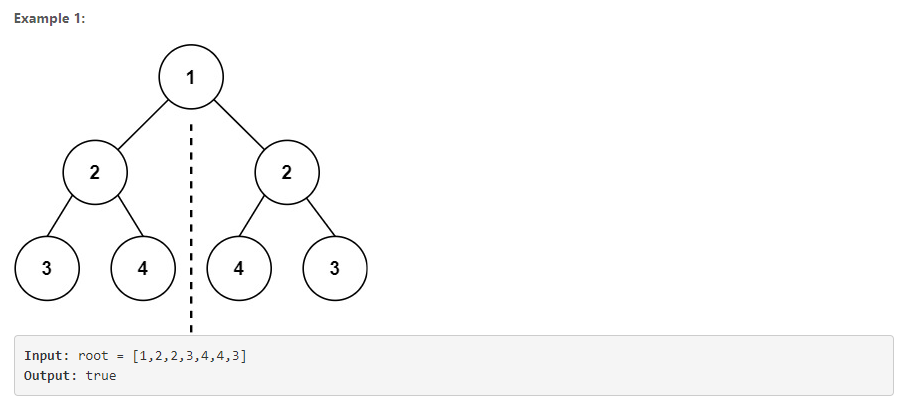

----
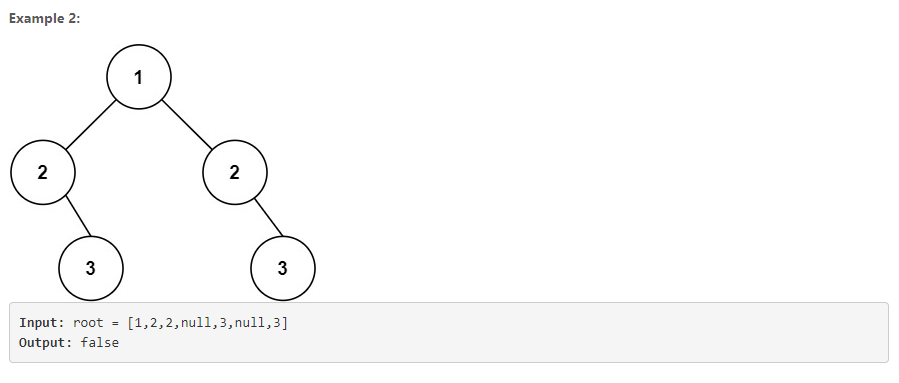

```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode() : val(0), left(nullptr), right(nullptr) {}
 *     TreeNode(int x) : val(x), left(nullptr), right(nullptr) {}
 *     TreeNode(int x, TreeNode *left, TreeNode *right) : val(x), left(left), right(right) {}
 * };
 */
class Solution {
public:
    
    bool helper(TreeNode* left, TreeNode* right){
        if(!left and !right){
            return true;
        }
        if(left and !right){
            return false;
        }
        if(!left and right){
            return false;
        }
        
        if(left->val != right->val){
            return false;
        }else{
            return helper(left->left, right->right) and helper(left->right, right->left);
        }

    }
    
    
    bool isSymmetric(TreeNode* root) {
        if(!root){
            return true;
        }
        return helper(root->left, root->right);
    }
};

```

### Solution
https://leetcode.com/problems/symmetric-tree/solution/

#### Approach 1: Recursive

```java
public boolean isSymmetric(TreeNode root) {
    return isMirror(root, root);
}

public boolean isMirror(TreeNode t1, TreeNode t2) {
    if (t1 == null && t2 == null) return true;
    if (t1 == null || t2 == null) return false;
    return (t1.val == t2.val)
        && isMirror(t1.right, t2.left)
        && isMirror(t1.left, t2.right);
}
```

#### Approach 2: Iterative
```java
public boolean isSymmetric(TreeNode root) {
    Queue<TreeNode> q = new LinkedList<>();
    q.add(root);
    q.add(root);
    while (!q.isEmpty()) {
        TreeNode t1 = q.poll();
        TreeNode t2 = q.poll();
        if (t1 == null && t2 == null) continue;
        if (t1 == null || t2 == null) return false;
        if (t1.val != t2.val) return false;
        q.add(t1.left);
        q.add(t2.right);
        q.add(t1.right);
        q.add(t2.left);
    }
    return true;
}
```

## Path Sum

Given the root of a binary tree and an integer targetSum, return true if the tree has a root-to-leaf path such that adding up all the values along the path equals targetSum.

A leaf is a node with no children.

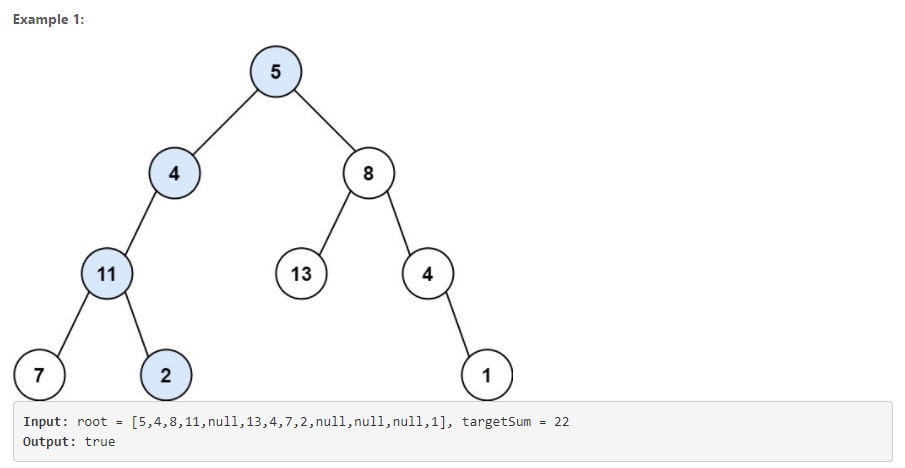

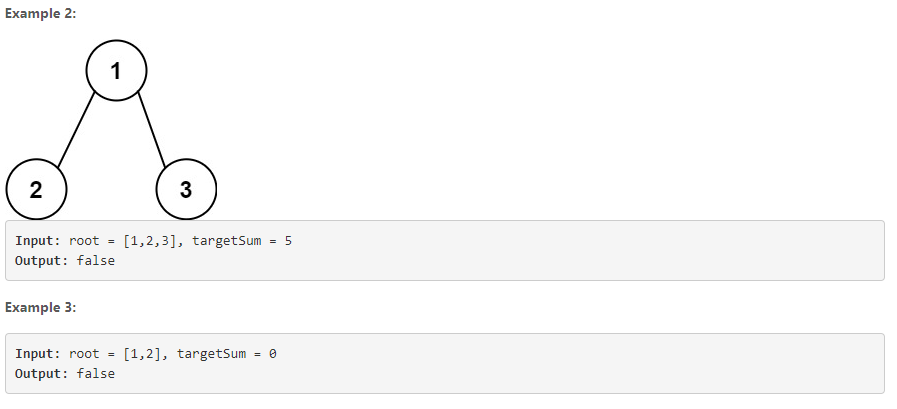

### Accepted

```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode() : val(0), left(nullptr), right(nullptr) {}
 *     TreeNode(int x) : val(x), left(nullptr), right(nullptr) {}
 *     TreeNode(int x, TreeNode *left, TreeNode *right) : val(x), left(left), right(right) {}
 * };
 */
class Solution {
public:
    
    bool helper(TreeNode* cur, int targetSum){
        if(!cur){
            return false;
        }
        
        if(!cur->left and !cur->right){
            return cur->val==targetSum;
        }
        
        if(cur->left){
            if(helper(cur->left, targetSum-cur->val)){
                return true;
            }
        }
        
        if(cur->right){
            if(helper(cur->right, targetSum-cur->val)){
                return true;
            }
        }
        return false;

    }
    
    
    
    
    bool hasPathSum(TreeNode* root, int targetSum) {
        return helper(root,targetSum);
    }
};

```

### Solutions
https://leetcode.com/problems/path-sum/solution/

```java
/* Definition for a binary tree node. */
public class TreeNode {
  int val;
  TreeNode left;
  TreeNode right;

  TreeNode(int x) {
    val = x;
  }
}
```

#### Approach 1: Recursion
```java
class Solution {
  public boolean hasPathSum(TreeNode root, int sum) {
    if (root == null)
      return false;

    sum -= root.val;
    if ((root.left == null) && (root.right == null))
      return (sum == 0);
    return hasPathSum(root.left, sum) || hasPathSum(root.right, sum);
  }
}
```

#### Approach 2: Iterations
```java
class Solution {
  public boolean hasPathSum(TreeNode root, int sum) {
    if (root == null)
      return false;

    LinkedList<TreeNode> node_stack = new LinkedList();
    LinkedList<Integer> sum_stack = new LinkedList();
    node_stack.add(root);
    sum_stack.add(sum - root.val);

    TreeNode node;
    int curr_sum;
    while ( !node_stack.isEmpty() ) {
      node = node_stack.pollLast();
      curr_sum = sum_stack.pollLast();
      if ((node.right == null) && (node.left == null) && (curr_sum == 0))
        return true;

      if (node.right != null) {
        node_stack.add(node.right);
        sum_stack.add(curr_sum - node.right.val);
      }
      if (node.left != null) {
        node_stack.add(node.left);
        sum_stack.add(curr_sum - node.left.val);
      }
    }
    return false;
  }
}
```


## Count Univalue Subtrees

https://leetcode.com/explore/learn/card/data-structure-tree/17/solve-problems-recursively/538/

Given the root of a binary tree, return the number of uni-value subtrees.

A uni-value subtree means all nodes of the subtree have the same value.

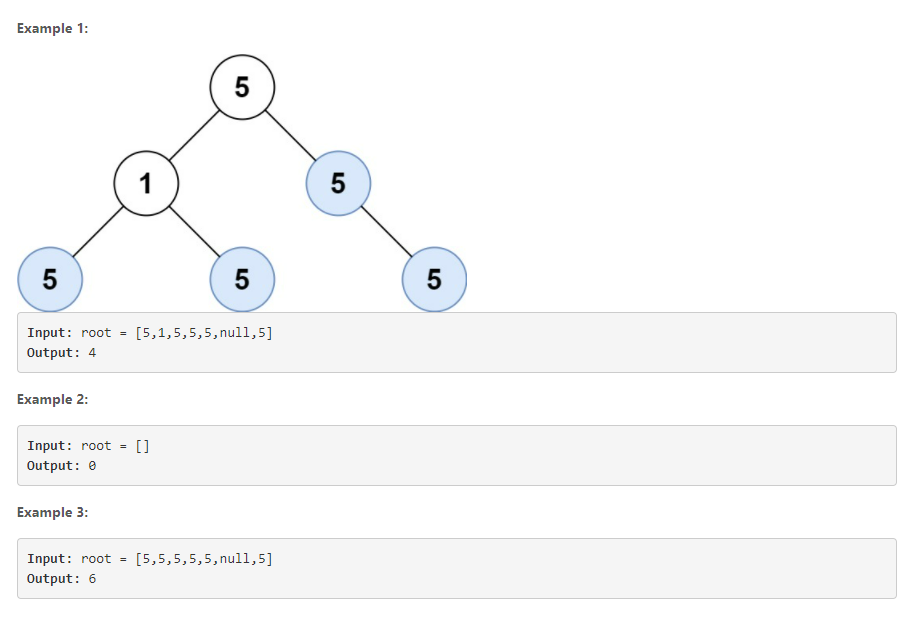

#### v1 not ready
```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode() : val(0), left(nullptr), right(nullptr) {}
 *     TreeNode(int x) : val(x), left(nullptr), right(nullptr) {}
 *     TreeNode(int x, TreeNode *left, TreeNode *right) : val(x), left(left), right(right) {}
 * };
 */
class Solution {
public:
    bool helper(TreeNode* cur, int upper_val, int& ways){
        if(!cur){
            return false;
        }
        
        if(!cur->left and !cur->right){
            ways++;
            return true;
        }
        
        if(cur->val==upper_val){
            if(helper(cur->left,upper_val, ways) and helper(cur->right,upper_val, ways)){
                ways+=1;
                return true;
            }
        }
        
        if(cur->left){
            helper(cur->left, cur->left->val, ways);
            }
        
        if(cur->right){
            helper(cur->right, cur->right->val, ways);
            }
        
        return false;

    }
    
    
    
    int countUnivalSubtrees(TreeNode* root) {
        int ways=0;
        helper(root, root->val, ways);
        return ways;
    }
};
```

### Not OK, will get skipped too.

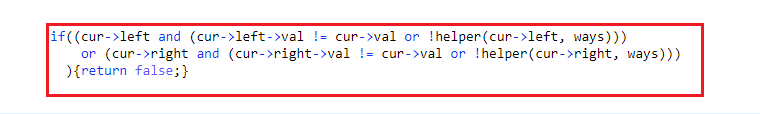

### 这里的顺序也很重要
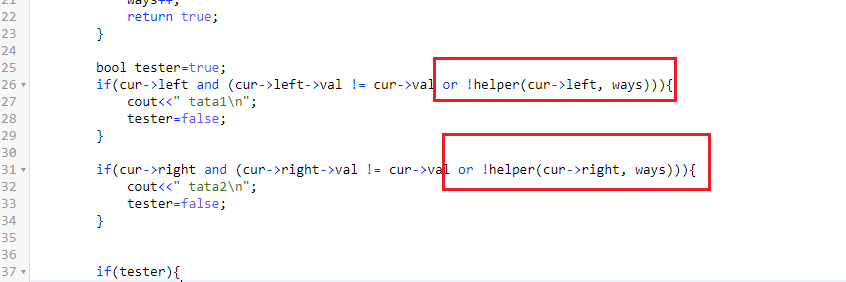

### Null list should always be your test case
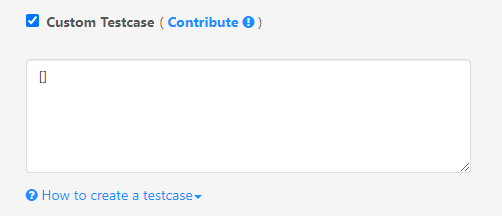

#### Accepted
```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode() : val(0), left(nullptr), right(nullptr) {}
 *     TreeNode(int x) : val(x), left(nullptr), right(nullptr) {}
 *     TreeNode(int x, TreeNode *left, TreeNode *right) : val(x), left(left), right(right) {}
 * };
 */
class Solution {
public:
    bool helper(TreeNode* cur, int& ways){
        
        if(!cur){
            return false;
        }
        
        if(!cur->left and !cur->right){
            ways++;
            return true;
        }
        
        bool tester=true;
        if(cur->left and (!helper(cur->left, ways) or cur->left->val != cur->val)){
            // cout<<" tata1\n";
            tester=false;
        }

        if(cur->right and (!helper(cur->right, ways) or cur->right->val != cur->val)){
            // cout<<" tata2\n";
            tester=false;
        }
        
        
        if(tester){
            ways++;
            return true;
        }else{
            return false;
        }

    }

    int countUnivalSubtrees(TreeNode* root) {
        int ways=0;
        helper(root, ways);
        
        return ways;
    }
};

```

### Solutions
https://leetcode.com/problems/count-univalue-subtrees/solution/

#### Approach 1: Depth First Search
```java
public class Solution {
    int count = 0;
    boolean is_uni(TreeNode node) {

        //base case - if the node has no children this is a univalue subtree
        if (node.left == null && node.right == null) {

            // found a univalue subtree - increment
            count++;
            return true;   
        }

        boolean is_unival = true;

        // check if all of the node's children are univalue subtrees and if they have the same value
        // also recursively call is_uni for children
        if (node.left != null) {
            is_unival = is_uni(node.left) && is_unival && node.left.val == node.val;
         }

        if (node.right != null) {
            is_unival = is_uni(node.right) && is_unival && node.right.val == node.val;
        }

        // return if a univalue tree exists here and increment if it does
        if (!is_unival) return false;
        count++;
        return true;
    }
    public int countUnivalSubtrees(TreeNode root) {
        if (root == null) return 0;
        is_uni(root);
        return count;
    }
}
```

#### Approach 2: Depth First Search - Pass Parent Values
```java
public class Solution {
    int count = 0;
    boolean is_valid_part(TreeNode node, int val) {

        // considered a valid subtree
        if (node == null) return true;

        // check if node.left and node.right are univalue subtrees of value node.val
        // note that || short circuits but | does not - both sides of the or get evaluated with | so we explore all possible routes
        if (!is_valid_part(node.left, node.val) | !is_valid_part(node.right, node.val)) return false;

        // if it passed the last step then this a valid subtree - increment
        count++;

        // at this point we know that this node is a univalue subtree of value node.val
        // pass a boolean indicating if this is a valid subtree for the parent node
        return node.val == val;
    }
    public int countUnivalSubtrees(TreeNode root) {
        is_valid_part(root, 0);
        return count;
    }
}
```